In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import glob
import re
import pandas as pd
import seaborn as sns

In [2]:
files = glob.glob('./logs/test/*.txt')
files

['./logs/test/rule_based_cav_20_hv_10_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_30_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_20_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_30_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_40_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_10_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_20_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_20_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_30_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_40_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_10_testing_hist.txt']

In [3]:
files.sort()

In [4]:
files

['./logs/test/gcn_cav_20_hv_10_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_20_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_30_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_40_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_10_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_20_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_30_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_40_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_50_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_10_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_20_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_30_testing_hist.txt']

In [5]:
file_name = files[0]

In [9]:
stat_df = pd.DataFrame(columns=['model_name','num_hv','mean','median','std'])

for file_name in files:
    with open(file_name,'r') as f:
        model_name = file_name.split('/')[-1].split('_')[0]
        if model_name == "rule":
            number = file_name.split('/')[-1].split('_')[5]
        
        else:
            number = file_name.split('/')[-1].split('_')[4]
        data = json.load(f)
        raw = np.array(data['episode_reward'])
        mean = raw.mean()
        median = np.median(raw)
        std = raw.std()
        stat_df = stat_df.append({"model_name": model_name,\
                                  "num_hv": number,\
                                  "mean":mean,\
                                  "median":median,\
                                  "std":std,\
                                  }, ignore_index=True)

stat_df

,model_name,num_hv,mean,median,std
0,gcn,10,4545.664287,4724.131684,572.423887
1,gcn,20,3731.160410,3912.142875,949.587188
2,gcn,30,4478.242408,4441.316511,618.986709
3,gcn,40,4859.079412,4869.470547,551.259884
4,gcn,50,5004.885557,5157.856037,849.662806
5,lstm,10,4284.345542,4453.604013,1048.771309
6,lstm,20,4229.977584,4329.962960,872.614400
7,lstm,30,4578.891568,4433.304214,806.127744
8,lstm,40,5113.975908,5164.453508,383.665971
9,lstm,50,4663.561724,4382.157834,943.409560


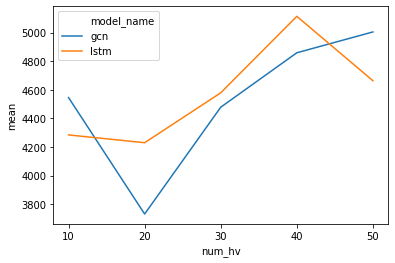

In [8]:
sns.lineplot(x='num_hv',y='mean',hue='model_name',data=stat_df)

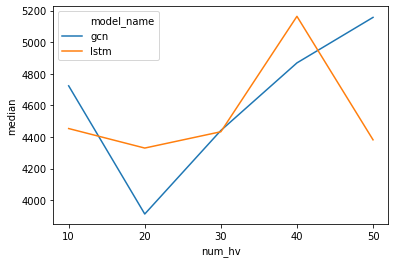

In [9]:
sns.lineplot(x='num_hv',y='median',hue='model_name',data=stat_df)